<strong>3 KPIs Seleccionados:</strong><br> 

---

<strong>Volatilidad del Precio (30 días):</strong><br>

<strong>Razón:</strong> La volatilidad indica el nivel de riesgo asociado con la inversión en una criptomoneda. Una baja volatilidad puede indicar estabilidad, mientras que una alta volatilidad puede presentar oportunidades de inversión a corto plazo.

<strong>Baja Volatilidad (Mensual): Menos del 10%.</strong><br>

Estas criptomonedas están mostrando poca variación en el mes en consideración. La baja volatilidad mensual podría indicar estabilidad temporal.

<strong>Volatilidad Media (Mensual): 10% - 30%.</strong><br>

Es un rango en el que muchas criptomonedas podrían encontrarse en un mes dado, especialmente aquellas que tienen un buen nivel de adopción y liquidez, pero que aún enfrentan eventos de mercado significativos.

<strong>Alta Volatilidad (Mensual): Más del 30%.</strong><br>

Criptomonedas en este rango están experimentando movimientos de precios significativos durante el mes. Esto podría ser el resultado de eventos específicos, noticias, especulación, entre otros factores.


Cabe destacar que estas categorizaciones son aproximadas y pueden no reflejar exactamente la naturaleza de todos los mercados de criptomonedas en todo el mundo. Además, el mercado criptográfico es altamente dinámico, por lo que lo que se considera volátil un mes podría no serlo al siguiente. Es siempre esencial mantenerse informado y actualizado sobre las condiciones del mercado.

---

<strong>Volumen de Comercio en 24h:</strong><br>

<strong>Razón:</strong> Un alto volumen de comercio sugiere una fuerte actividad y liquidez para la criptomoneda. Esto es crucial para los inversores que desean comprar o vender grandes cantidades sin afectar significativamente el precio.

<strong>Criptomonedas con Alto Volumen de Comercio:(Volumen en las últimas 24 horas: Mayor a 1 mil millones de dólares)</strong><br>
Características:
Suelen ser las criptomonedas más conocidas y confiables.
Alta liquidez y, generalmente, menor volatilidad en comparación con monedas de menor volumen.
Puede haber una mayor resistencia a la manipulación del precio.
Ejemplos: Bitcoin (BTC), Ethereum (ETH), Binance Coin (BNB).

<strong>Criptomonedas con Volumen de Comercio Medio:(Volumen en las últimas 24 horas: Entre 100 millones y 1 mil millones de dólares)</strong><br>
Características:
Estas criptomonedas suelen tener una presencia consolidada en el mercado, pero aún no alcanzan los niveles de las más grandes.
Liquidez moderada, lo que las hace razonablemente estables pero susceptibles a grandes movimientos con órdenes de mayor tamaño.
Ejemplos pueden variar, pero algunas como Chainlink (LINK) o Litecoin (LTC) podrían entrar en esta categoría en determinados momentos.

<strong>Criptomonedas con Bajo Volumen de Comercio:(Volumen en las últimas 24 horas: Menos de 100 millones de dólares)</strong><br>
Características:
Estas monedas pueden ser menos líquidas, lo que significa que grandes órdenes pueden tener un impacto más significativo en el precio.
Mayor susceptibilidad a la manipulación de precios y "bombas y descargas" (pump and dump).
Investigación exhaustiva requerida antes de invertir, ya que muchas pueden ser proyectos muy nuevos o menos probados en el mercado.

---

<strong>Capitalización de Mercado:</strong><br>

<strong>Razón:</strong> Representa el valor total de una criptomoneda y es un indicador de su popularidad y adopción en el mercado. Una alta capitalización puede ser una señal de confianza en esa criptomoneda.

<strong>Criptomonedas de Alta Capitalización: (Mayor a 10 mil millones de dólares)</strong><br>
Ejemplos: Bitcoin (BTC), Ethereum (ETH), Binance Coin (BNB), Cardano (ADA), entre otras.
Características:
Generalmente, son monedas más establecidas con una mayor historia y adopción.
Suelen tener comunidades más grandes y activas.
Se perciben como "menos riesgosas" en comparación con monedas de menor capitalización, aunque sigue siendo un mercado volátil.

<strong>Criptomonedas de Capitalización Media: (Entre 1 mil millones y 10 mil millones de dólares)</strong><br>
Ejemplos pueden variar con el tiempo, pero pueden incluir monedas como Chainlink (LINK), Litecoin (LTC), Stellar (XLM), entre otras.
Características:
Estas criptomonedas a menudo tienen tecnologías o propuestas de valor sólidas pero todavía no han alcanzado la adopción masiva.
Pueden ser más volátiles que las monedas de alta capitalización.
A menudo, se consideran como monedas con potencial de crecimiento.

<strong>Criptomonedas de Baja Capitalización: (Menos de 1 mil millones de dólares)</strong><br>
Hay miles de estas monedas, muchas de las cuales son proyectos nuevos o menos conocidos.
Características:
Son las más volátiles y, por ende, las más riesgosas.
Pueden ofrecer retornos más altos, pero también hay un mayor riesgo de pérdida total.
Es fundamental investigar bien antes de invertir en estas criptomonedas, ya que muchas no tienen un producto funcional o una comunidad activa detrás.

---

Aqui vamos a investigar cada una de las criptomonedas en un historico de datos relevantes de cada una traidos de la API de Coingecko, nos traemos precio de cierre, capitalizacion de mercado, y volumen operado en 24hs en el formato siguiente es como la API lo devuelve:<br><br>

{<br>
  "prices": [UNIX timestamp , precio],<br>
  "market_caps": [UNIX timestamp , capitalizacion de mercado],<br>
  "total_volumes": [UNIX timestamp , volumen total de operaciones en 24hs]<br>
}<br><br>

**(UNIX timestamp en milisegundos)**<br>
**luego UNIX timestamp lo transformaré a formato de fecha YY/MM/DD**<br>

**Formula extraida de la web que define volatilidad en 30 dias:**<br>

**retornos = [((precios[i] - precios[i - 1]) / precios[i - 1]) for i in range(1, len(precios))]**<br>

**Calculo la volatilidad (desviación estándar de los retornos)**
**volatilidad = np.std(retornos) * np.sqrt(30)**<br>
**Asumiendo 30 días en un mes**<br>

---

In [5]:
import requests
import csv
import numpy as np
from datetime import datetime
import time

monedas = ['bitcoin', 'ethereum', 'binancecoin', 'cardano', 'dogecoin', 'polkadot', 'ripple', 'solana', 'tether', 'matic-network']

URL_BASE = "https://api.coingecko.com/api/v3/coins/"

# Obtener marca de tiempo Unix de hace 10 años
hace_diez_anos = time.time() - (10 * 365 * 24 * 60 * 60)  # 10 años en segundos
TIMESTAMP_HACE_10_ANOS = int(hace_diez_anos)

# Obtener marca de tiempo Unix actual
TIMESTAMP_ACTUAL = int(time.time())

def obtener_datos(moneda, desde_timestamp, hasta_timestamp):
    url = f"{URL_BASE}{moneda}/market_chart/range?vs_currency=usd&from={TIMESTAMP_HACE_10_ANOS}&to={TIMESTAMP_ACTUAL}"
    respuesta = requests.get(url)
    datos = respuesta.json()
    return datos

def calcular_volatilidad(precios):
    # Calcular retornos diarios
    retornos = [((precios[i] - precios[i - 1]) / precios[i - 1]) for i in range(1, len(precios))]
    
    # Calcular la volatilidad (desviación estándar de los retornos)
    volatilidad = np.std(retornos) * np.sqrt(30) # Asumiendo 30 días en un mes
    return volatilidad

def guardar_en_csv(moneda, datos):
    with open(f"{moneda}.csv", "w", newline='') as archivo:
        # Escribir los encabezados primero
        archivo.write("Fecha,Precio,Capitalizacion_de_Mercado,Volumen_24h,Volatilidad_a_30_dias\n")

        precios = [elemento[1] for elemento in datos['prices']]
        
        for i in range(len(datos['prices'])):
            fecha = datetime.utcfromtimestamp(datos['prices'][i][0] / 1000).strftime('%y-%m-%d')
            precio = "{:.3f}".format(datos['prices'][i][1])
            
            # Comprobar si el índice i existe en 'market_caps' y 'total_volumes'
            cap_mercado = "{:.3f}".format(datos['market_caps'][i][1]) if i < len(datos['market_caps']) else 0
            volumen = "{:.3f}".format(datos['total_volumes'][i][1]) if i < len(datos['total_volumes']) else 0
            
            # Calcular la volatilidad de los últimos 30 días si hay suficientes datos disponibles
            if i >= 29:
                volatilidad = "{:.3f}".format(calcular_volatilidad(precios[i-29:i+1]))
            else:
                volatilidad = 0
            
            fila = f"{fecha},{precio},{cap_mercado},{volumen},{volatilidad}"
            
            # Solo añade un salto de línea si no es el último elemento
            archivo.write(fila + ("\n" if i < len(datos['prices']) - 1 else ""))

def eliminar_ultimas_filas_vacias_o_incompletas(ruta_archivo_csv):
    with open(ruta_archivo_csv, 'r', newline='') as archivo:
        lineas = archivo.readlines()
       
        # Eliminar la última fila
        lineas = lineas[:-1]

        # Quitar el salto de línea del final para evitar un salto extra al escribir el archivo
        lineas[-1] = lineas[-1].rstrip('\n')

    with open(ruta_archivo_csv, 'w', newline='') as archivo:
        archivo.writelines(lineas)

for moneda in monedas:
    datos = obtener_datos(moneda, TIMESTAMP_HACE_10_ANOS, TIMESTAMP_ACTUAL)
    guardar_en_csv(moneda, datos)
    eliminar_ultimas_filas_vacias_o_incompletas(f"{moneda}.csv")  

<strong>ETL: aqui realizo el análisis exploratorio visual y la detección de valores atípicos (outliers) de ciertos atributos de diferentes criptomonedas.</strong><br>

Importación de bibliotecas:<br>

matplotlib: para la visualización de gráficos.<br>
seaborn: otra herramienta de visualización que se construye sobre matplotlib y permite gráficos más atractivos y estadísticamente informados.<br>
scipy.stats: para obtener las puntuaciones Z (z-scores), que se usarán para la detección de outliers.<br>
numpy: para operaciones matemáticas y de arreglo.<br>

-----------------------------
binancecoin.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      2167 non-null   object 
 1   Precio                     2167 non-null   float64
 2   Capitalizacion_de_Mercado  2167 non-null   float64
 3   Volumen_24h                2167 non-null   float64
 4   Volatilidad_a_30_dias      2167 non-null   float64
dtypes: float64(4), object(1)
memory usage: 84.8+ KB
None
-----------------------------
           Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count       2167  2167.000000               2.167000e+03  2.167000e+03   
unique      2167          NaN                        NaN           NaN   
top     17-09-16          NaN                        NaN           NaN   
freq           1          NaN             

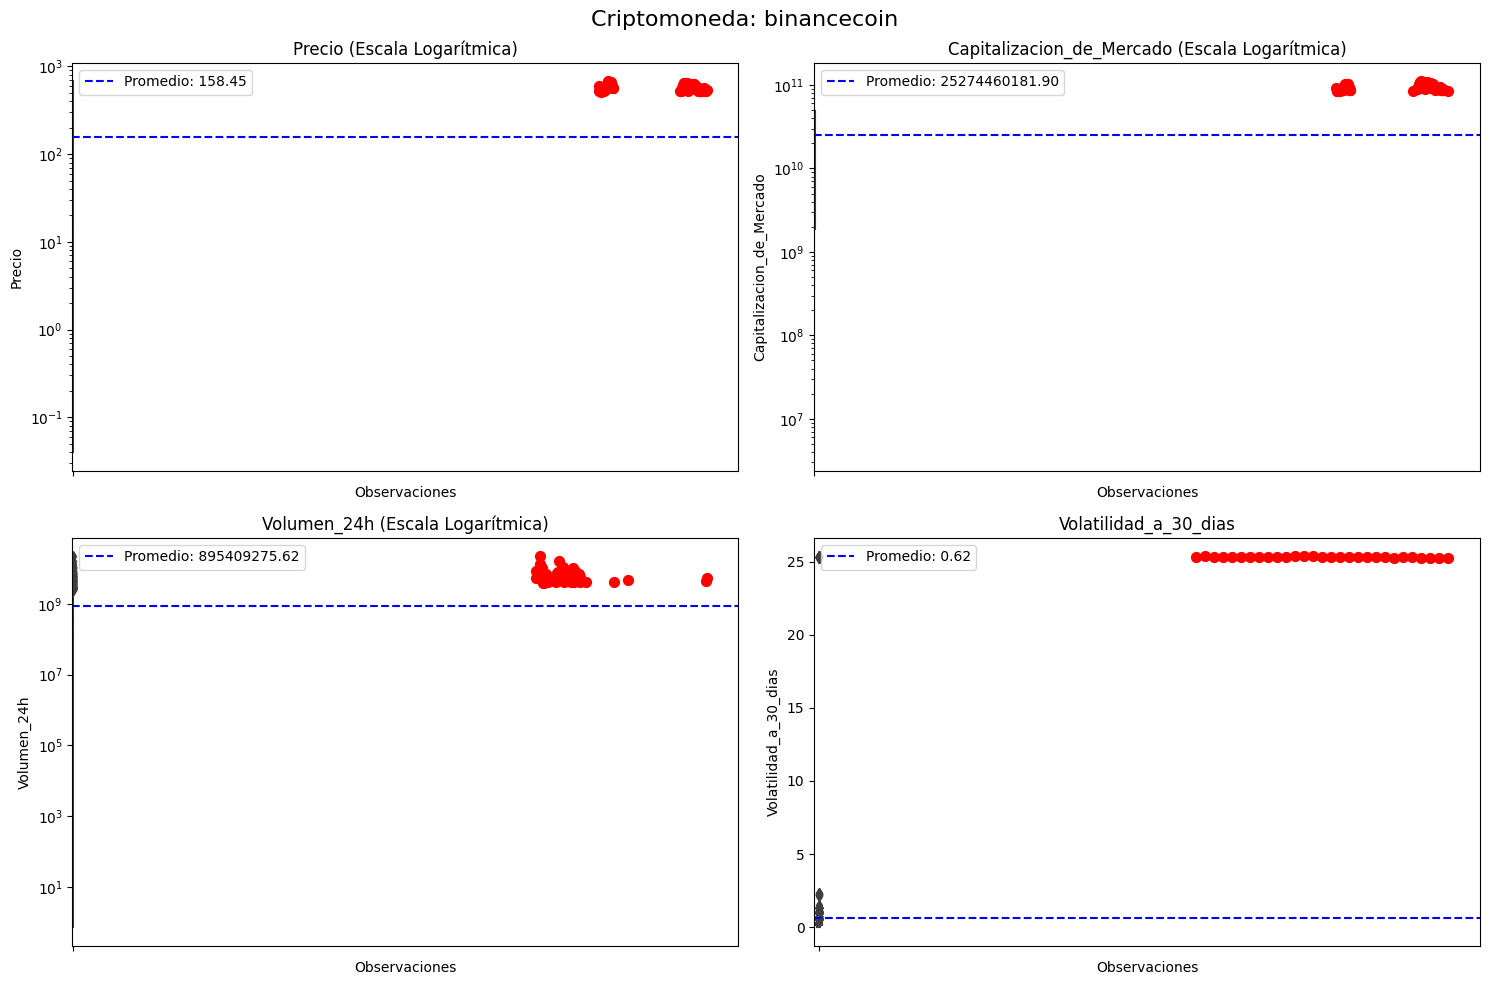

-----------------------------
bitcoin.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      3648 non-null   object 
 1   Precio                     3648 non-null   float64
 2   Capitalizacion_de_Mercado  3648 non-null   float64
 3   Volumen_24h                3648 non-null   float64
 4   Volatilidad_a_30_dias      3648 non-null   float64
dtypes: float64(4), object(1)
memory usage: 142.6+ KB
None
-----------------------------
           Fecha        Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count       3648   3648.000000               3.648000e+03  3.648000e+03   
unique      3648           NaN                        NaN           NaN   
top     13-08-28           NaN                        NaN           NaN   
freq           1           NaN           

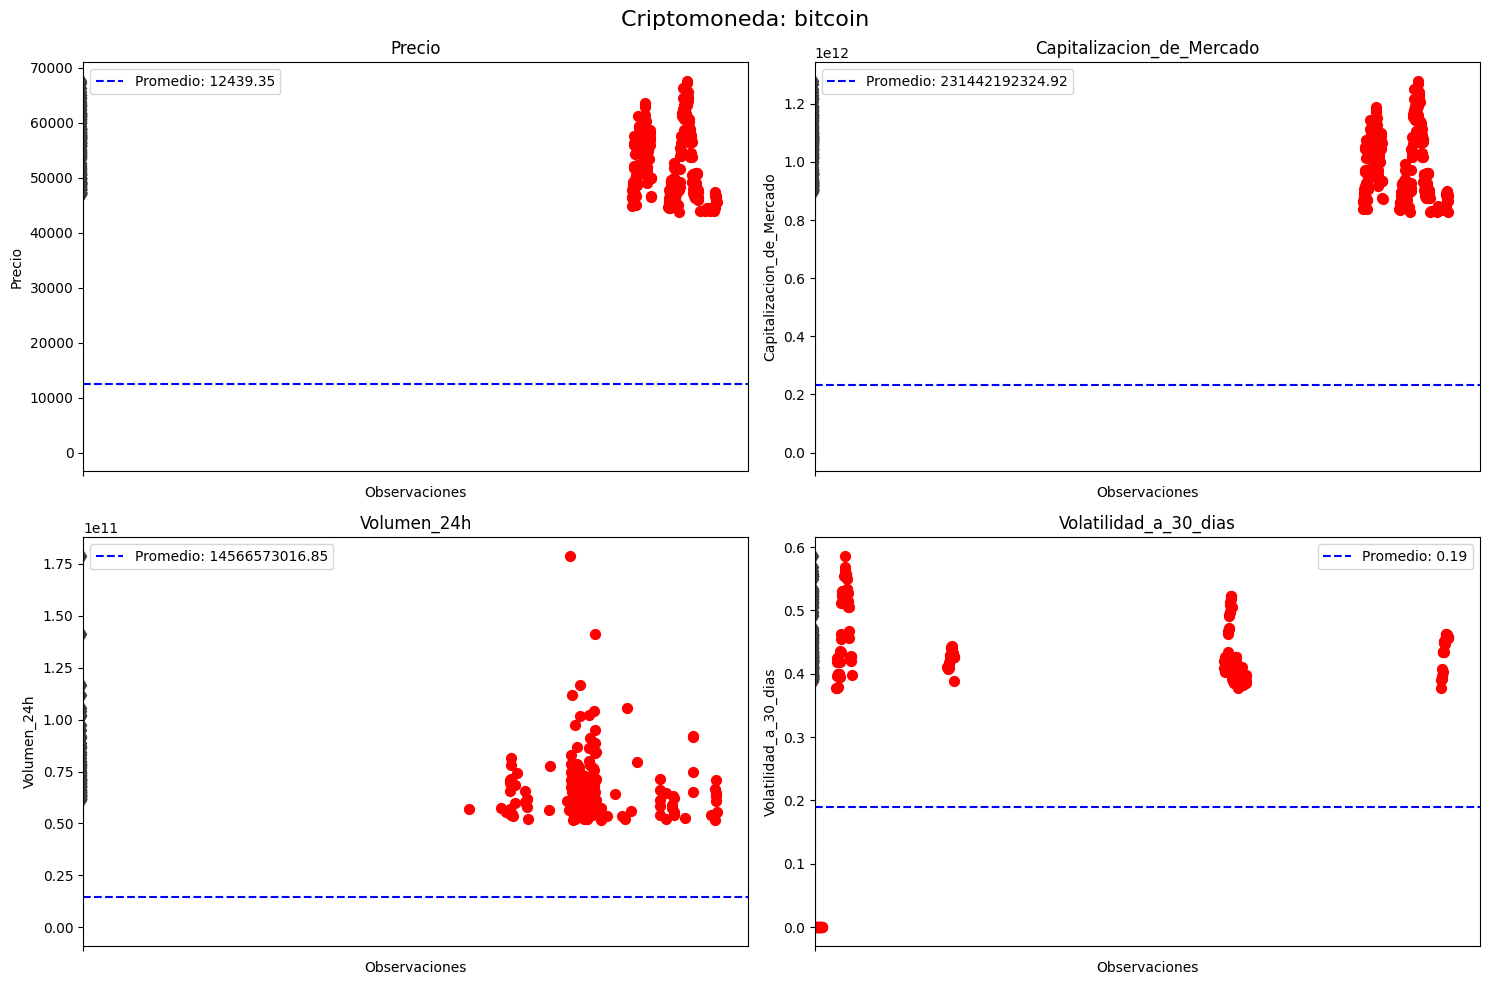

-----------------------------
cardano.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      2137 non-null   object 
 1   Precio                     2137 non-null   float64
 2   Capitalizacion_de_Mercado  2137 non-null   float64
 3   Volumen_24h                2137 non-null   float64
 4   Volatilidad_a_30_dias      2137 non-null   float64
dtypes: float64(4), object(1)
memory usage: 83.6+ KB
None
-----------------------------
           Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count       2137  2137.000000               2.137000e+03  2.137000e+03   
unique      2137          NaN                        NaN           NaN   
top     17-10-18          NaN                        NaN           NaN   
freq           1          NaN                 

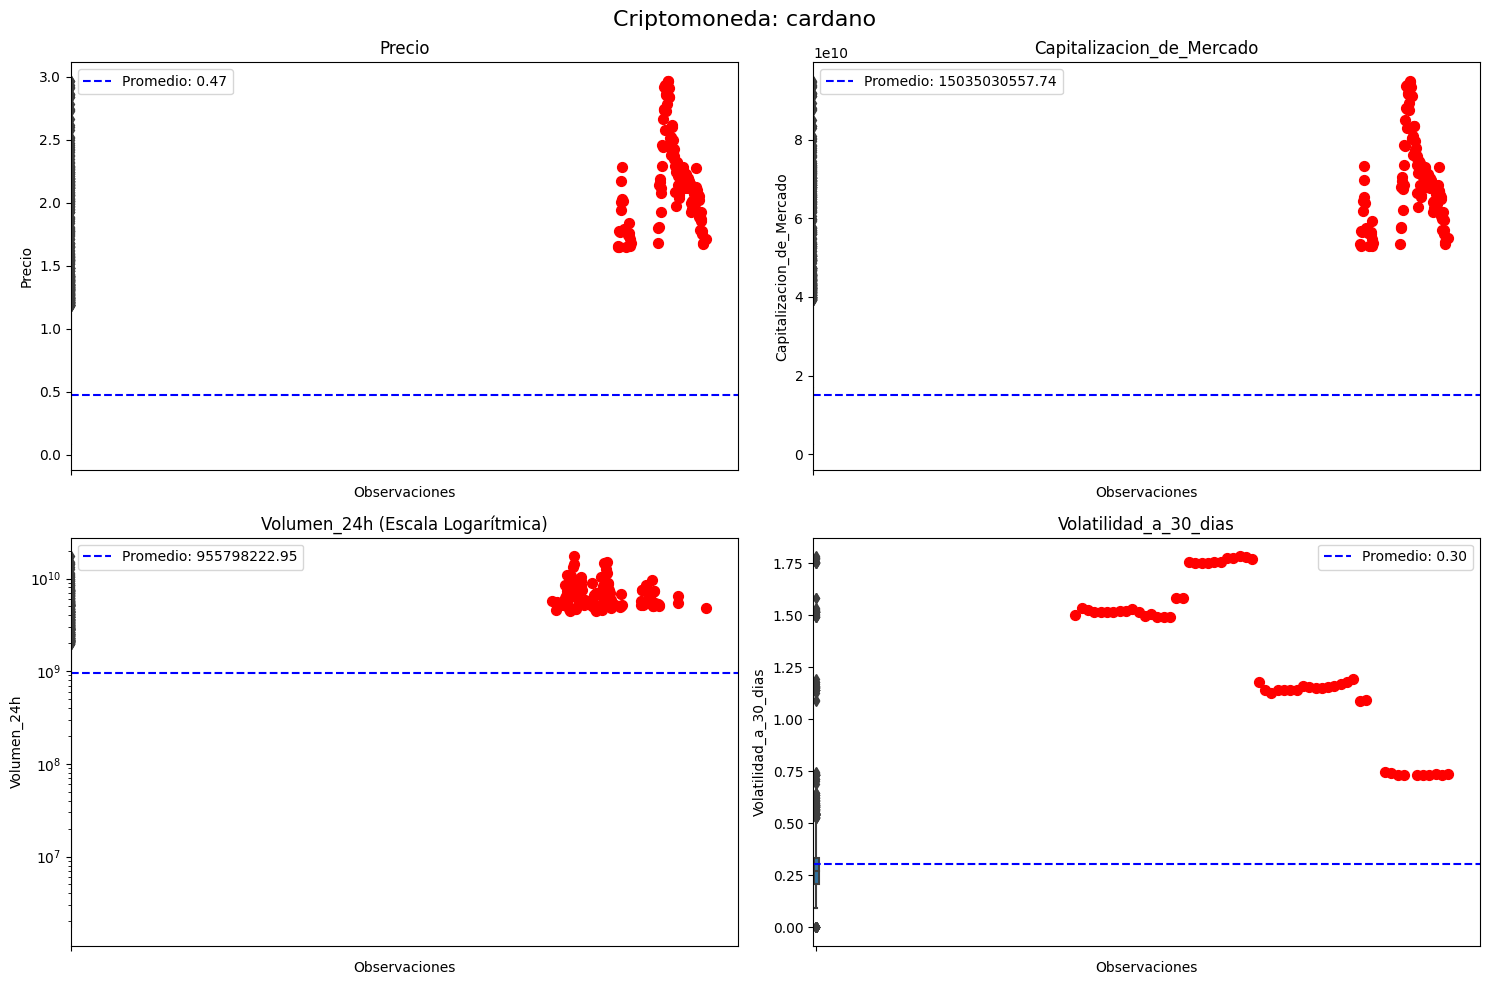

-----------------------------
dogecoin.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      3537 non-null   object 
 1   Precio                     3537 non-null   float64
 2   Capitalizacion_de_Mercado  3537 non-null   float64
 3   Volumen_24h                3537 non-null   float64
 4   Volatilidad_a_30_dias      3537 non-null   float64
dtypes: float64(4), object(1)
memory usage: 138.3+ KB
None
-----------------------------
           Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count       3537  3537.000000               3.537000e+03  3.537000e+03   
unique      3537          NaN                        NaN           NaN   
top     13-12-15          NaN                        NaN           NaN   
freq           1          NaN               

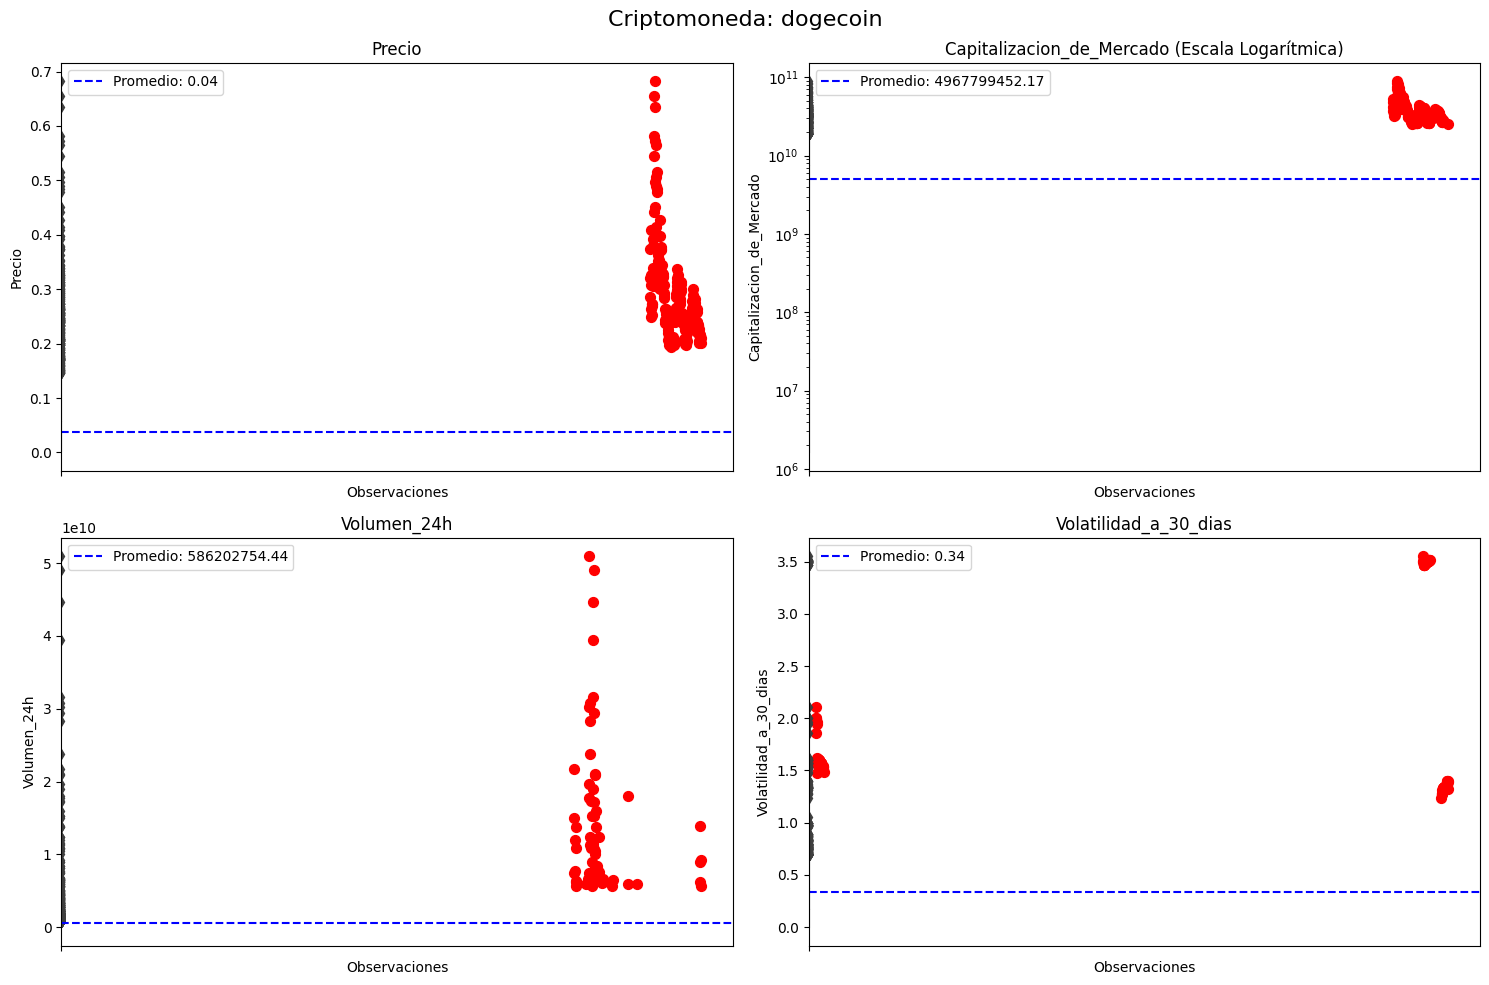

-----------------------------
ethereum.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      2939 non-null   object 
 1   Precio                     2939 non-null   float64
 2   Capitalizacion_de_Mercado  2939 non-null   float64
 3   Volumen_24h                2939 non-null   float64
 4   Volatilidad_a_30_dias      2939 non-null   float64
dtypes: float64(4), object(1)
memory usage: 114.9+ KB
None
-----------------------------
           Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count       2939  2939.000000               2.939000e+03  2.939000e+03   
unique      2939          NaN                        NaN           NaN   
top     15-08-07          NaN                        NaN           NaN   
freq           1          NaN               

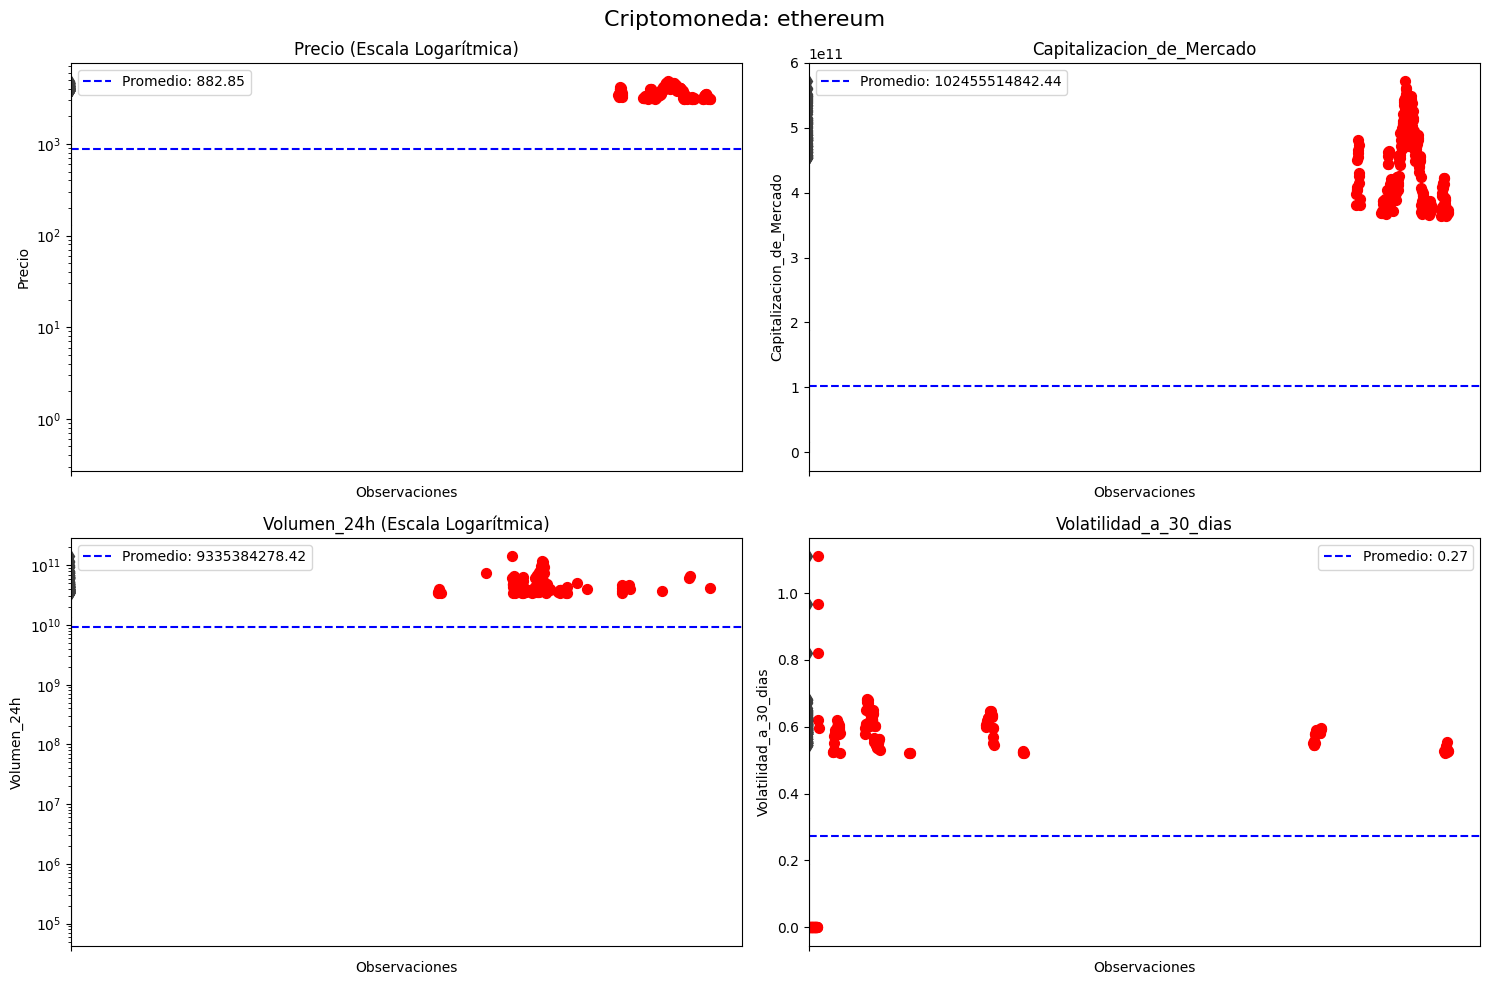

-----------------------------
matic-network.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1581 non-null   object 
 1   Precio                     1581 non-null   float64
 2   Capitalizacion_de_Mercado  1581 non-null   float64
 3   Volumen_24h                1581 non-null   float64
 4   Volatilidad_a_30_dias      1581 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.9+ KB
None
-----------------------------
           Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count       1581  1581.000000               1.581000e+03  1.581000e+03   
unique      1581          NaN                        NaN           NaN   
top     19-04-27          NaN                        NaN           NaN   
freq           1          NaN           

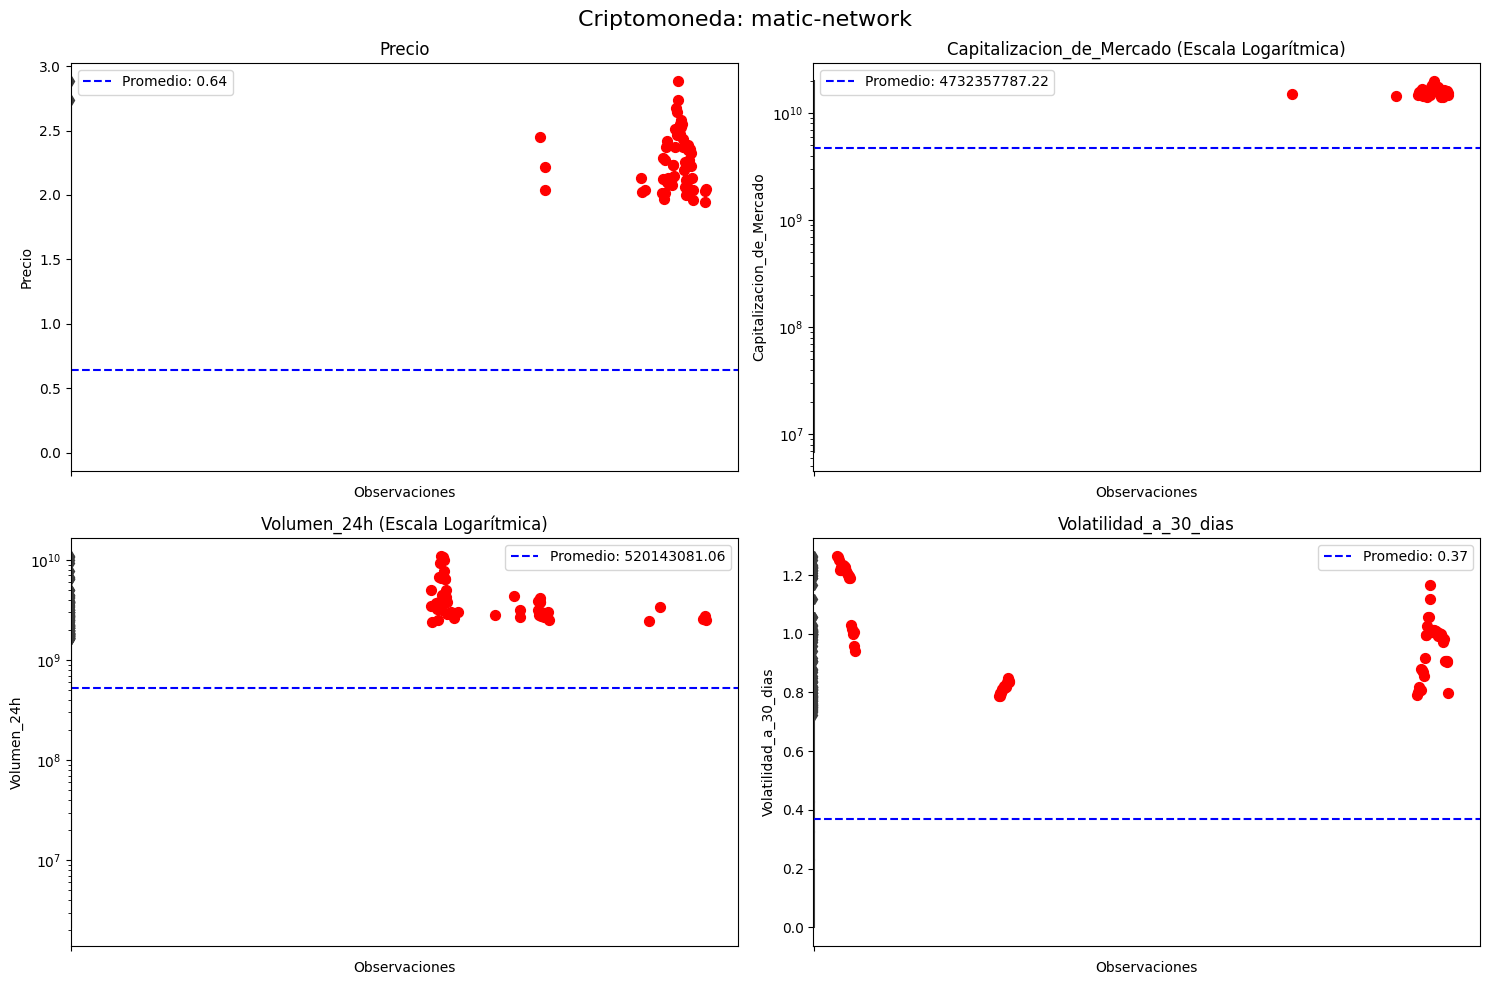

-----------------------------
polkadot.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1101 non-null   object 
 1   Precio                     1101 non-null   float64
 2   Capitalizacion_de_Mercado  1101 non-null   float64
 3   Volumen_24h                1101 non-null   float64
 4   Volatilidad_a_30_dias      1101 non-null   float64
dtypes: float64(4), object(1)
memory usage: 43.1+ KB
None
-----------------------------
           Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count       1101  1101.000000               1.101000e+03  1.101000e+03   
unique      1101          NaN                        NaN           NaN   
top     20-08-19          NaN                        NaN           NaN   
freq           1          NaN                

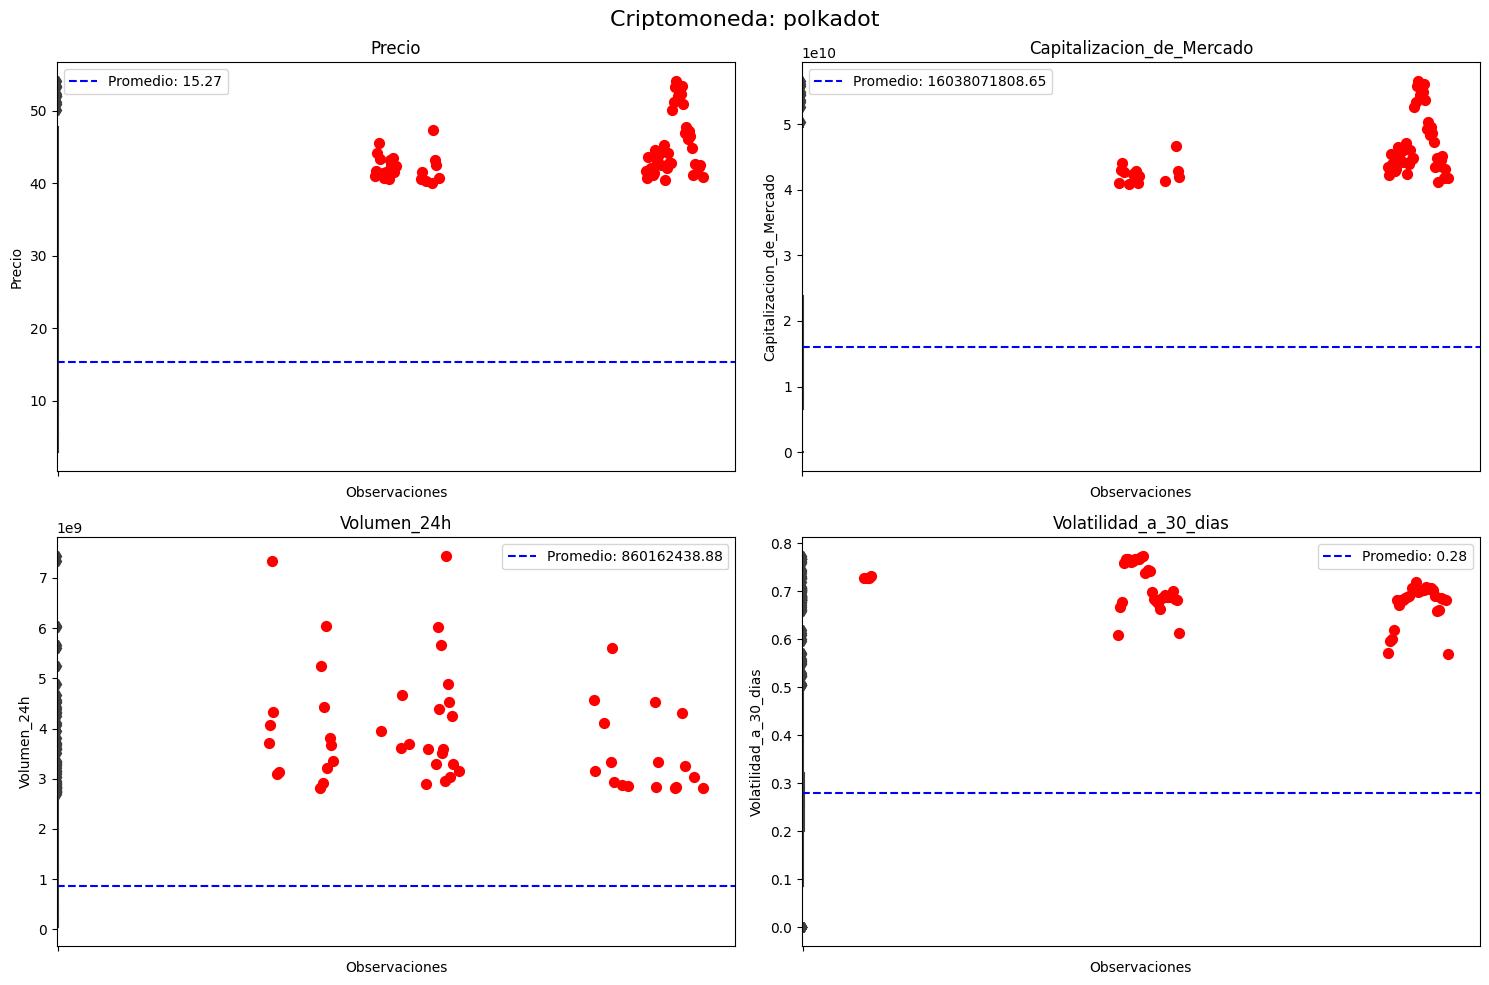

-----------------------------
ripple.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      3644 non-null   object 
 1   Precio                     3644 non-null   float64
 2   Capitalizacion_de_Mercado  3644 non-null   float64
 3   Volumen_24h                3644 non-null   float64
 4   Volatilidad_a_30_dias      3644 non-null   float64
dtypes: float64(4), object(1)
memory usage: 142.5+ KB
None
-----------------------------
           Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count       3644  3644.000000               3.644000e+03  3.644000e+03   
unique      3644          NaN                        NaN           NaN   
top     13-08-28          NaN                        NaN           NaN   
freq           1          NaN                 

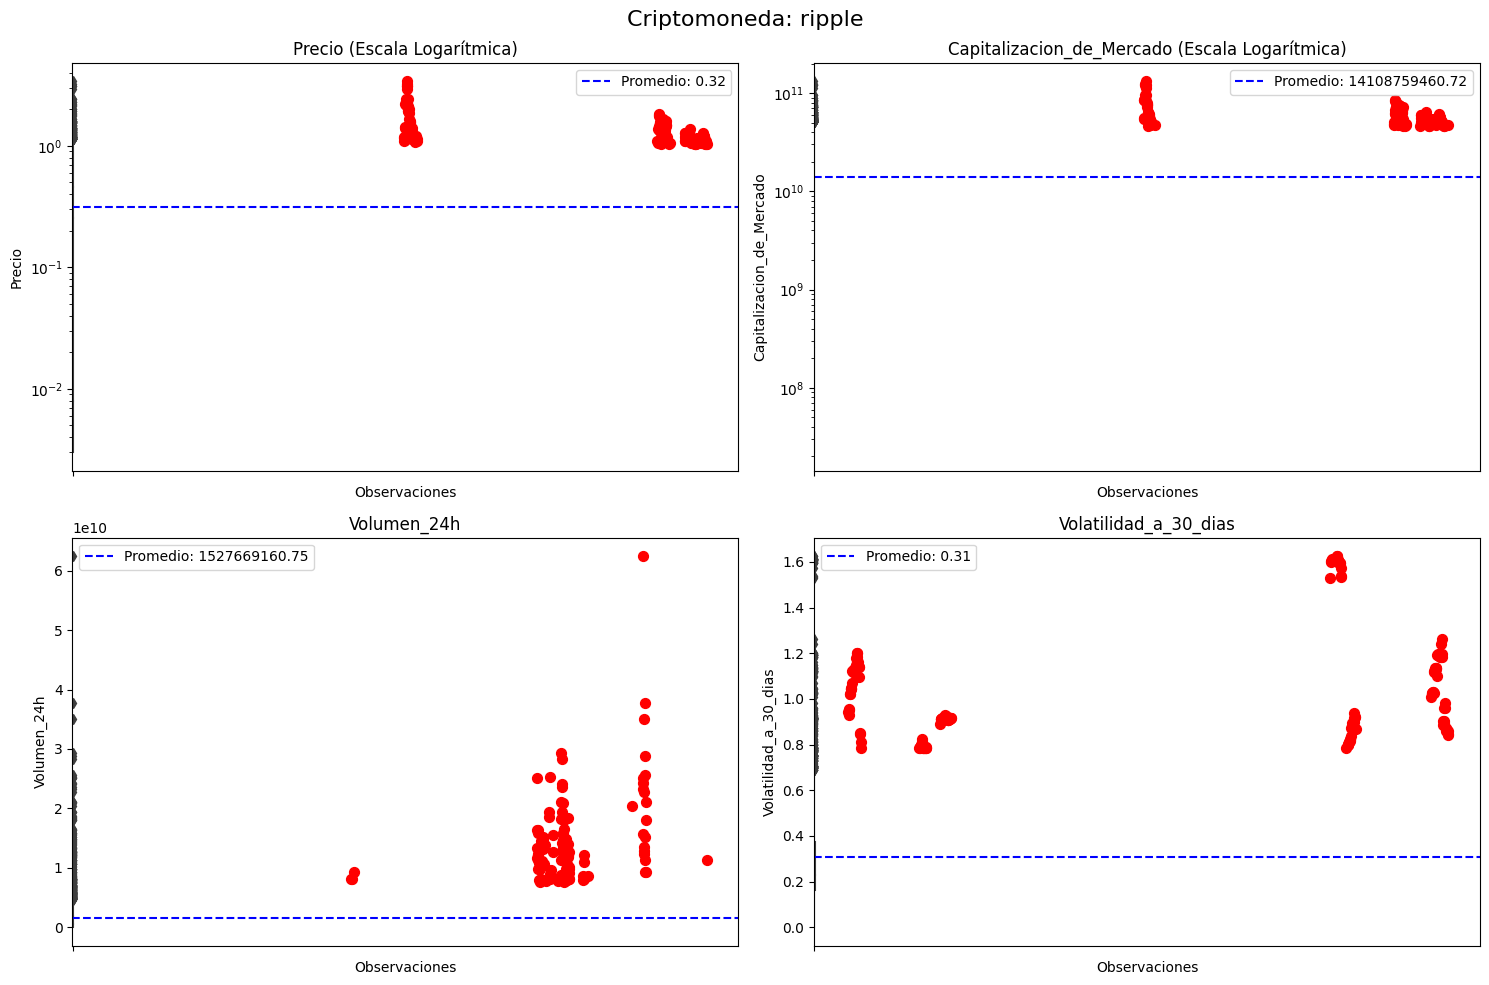

-----------------------------
solana.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1231 non-null   object 
 1   Precio                     1231 non-null   float64
 2   Capitalizacion_de_Mercado  1231 non-null   float64
 3   Volumen_24h                1231 non-null   float64
 4   Volatilidad_a_30_dias      1231 non-null   float64
dtypes: float64(4), object(1)
memory usage: 48.2+ KB
None
-----------------------------
           Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count       1231  1231.000000               1.231000e+03  1.231000e+03   
unique      1231          NaN                        NaN           NaN   
top     20-04-11          NaN                        NaN           NaN   
freq           1          NaN                  

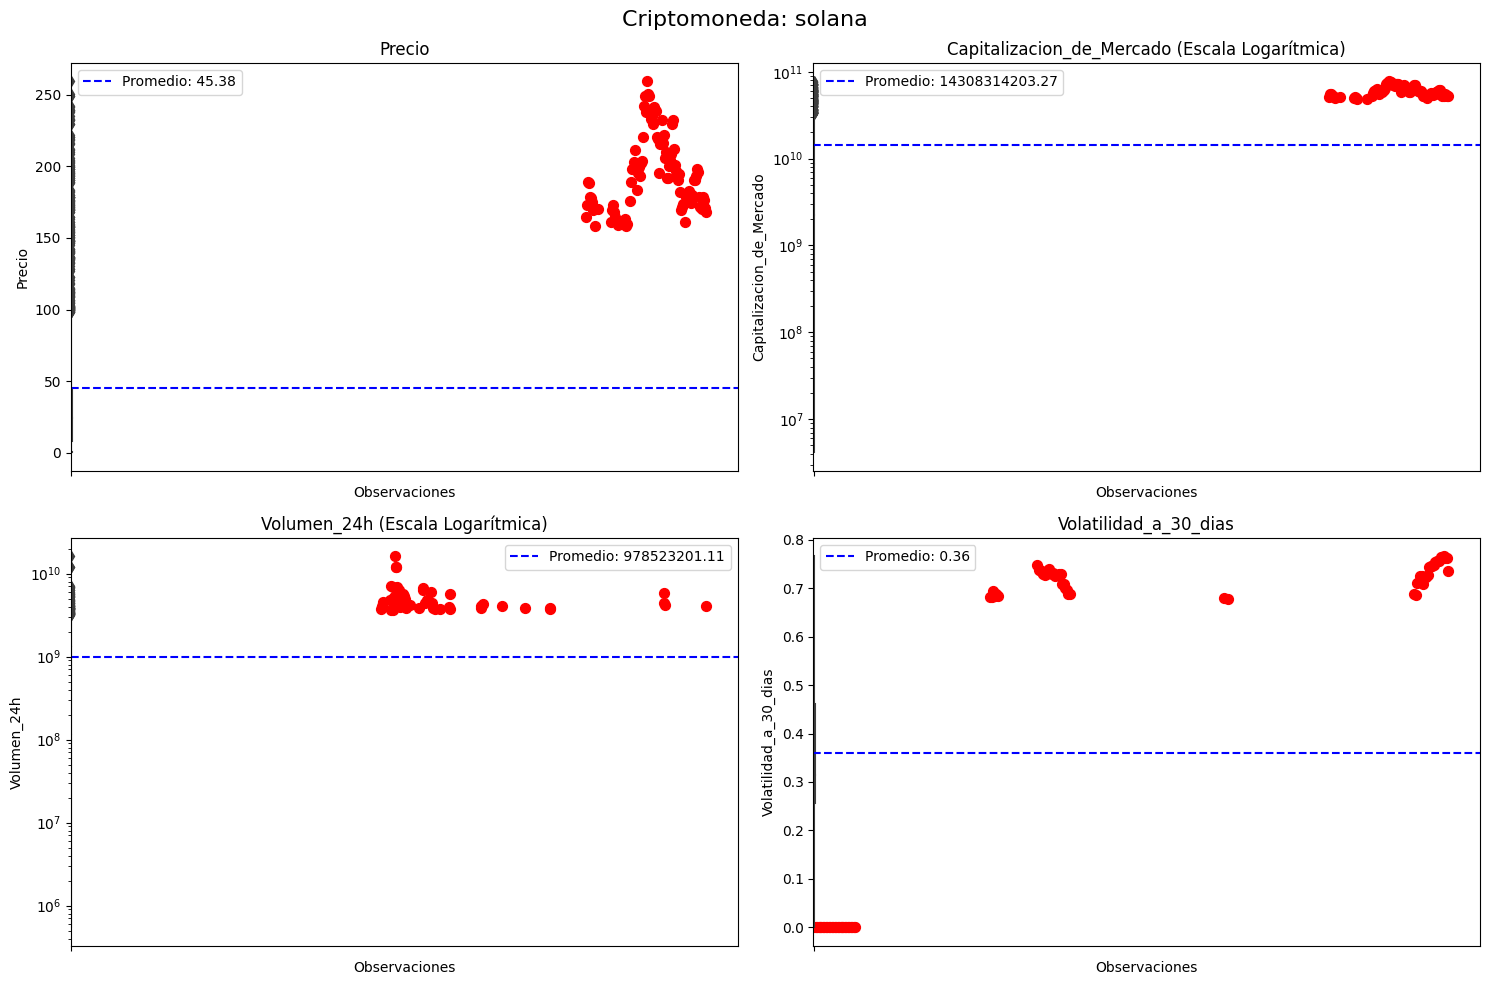

-----------------------------
tether.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      3080 non-null   object 
 1   Precio                     3080 non-null   float64
 2   Capitalizacion_de_Mercado  3080 non-null   float64
 3   Volumen_24h                3080 non-null   float64
 4   Volatilidad_a_30_dias      3080 non-null   float64
dtypes: float64(4), object(1)
memory usage: 120.4+ KB
None
-----------------------------
           Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count       3080  3080.000000               3.080000e+03  3.080000e+03   
unique      3080          NaN                        NaN           NaN   
top     15-02-25          NaN                        NaN           NaN   
freq           1          NaN                 

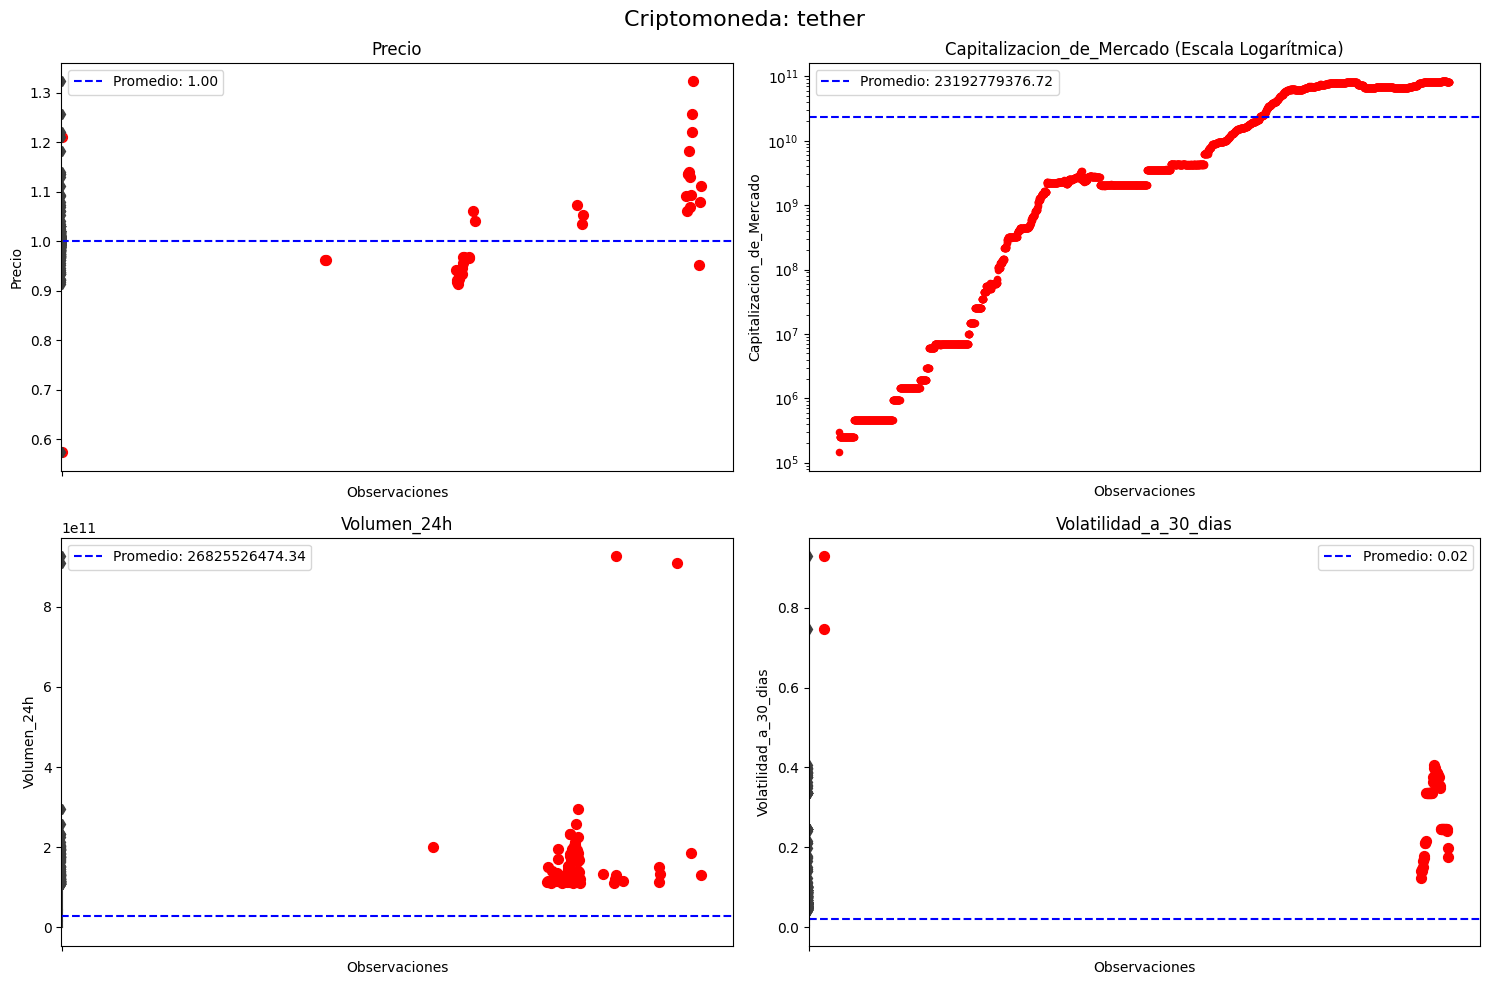

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Lista de columnas a analizar
columns_to_analyze = ['Precio','Capitalizacion_de_Mercado','Volumen_24h','Volatilidad_a_30_dias']

# Obtener todos los archivos CSV en el directorio actual
archivos_csv = [archivo for archivo in os.listdir() if archivo.endswith('.csv')]

for archivo in archivos_csv:
    df = pd.read_csv(archivo)
    
    # Convertir las columnas a numéricas y reemplazar valores no numéricos con 0
    for column in ['Volumen_24h', 'Capitalizacion_de_Mercado', 'Precio']:
        df[column] = pd.to_numeric(df[column], errors='coerce')
        df[column].fillna(0, inplace=True)
    
    """aqui haremos parte del ETL:

    Para columnas numéricas:

    count: número de valores no nulos.
    mean: media aritmética.
    std: desviación estándar.
    min: valor mínimo.
    25%: percentil 25.
    50%: mediana o percentil 50.
    75%: percentil 75.
    max: valor máximo.

    Para columnas no numéricas (por ejemplo, tipo object o categorial):

    count: número de valores no nulos.
    unique: número de valores únicos.
    top: valor más común.
    freq: frecuencia del valor más común."""

    print("-----------------------------")
    print(archivo)
    print("-----------------------------")
    print(df.info())
    print("-----------------------------")
    print(df.describe(include="all"))
    print("--------------------------------------------------------")
    
    plt.figure(figsize=(15, 10))
    
    for i, column in enumerate(columns_to_analyze, 1):
        z_scores = stats.zscore(df[column])
        abs_z_scores = np.abs(z_scores)
        outliers = df[(abs_z_scores > 2)]
        
        ax = plt.subplot(2, 2, i)  # Creando 4 subplots: 2 filas y 2 columnas
        
        # Si es Tether y la columna es 'Capitalizacion_de_Mercado', grafica solo los outliers
        if archivo == "tether.csv" and column == 'Capitalizacion_de_Mercado':
            plt.scatter(df.index, df[column], s=20, color='red')  # Grafica todos los puntos en gris
            plt.scatter(outliers.index, outliers[column], color='red', s=100)  # Grafica outliers en rojo con tamaño 100
            ax.set_xticks([])
            plt.xlabel("Observaciones", labelpad=10)
        else:
            sns.boxplot(y=df[column], ax=ax)
            plt.scatter(outliers.index, outliers[column], color='red', s=50)  # Marca outliers en rojo
        
        # Agregar una línea horizontal para el valor promedio
        avg_value = df[column].mean()
        ax.axhline(y=avg_value, color='blue', linestyle='--', label=f"Promedio: {avg_value:.2f}")
        
        # Establecer escala logarítmica si los datos varían en varios órdenes de magnitud
        if df[column].min() > 0 and df[column].max() / df[column].min() > 1000:
            ax.set_yscale("log")
            plt.title(f"{column} (Escala Logarítmica)")
        else:
            plt.title(column)
        
        plt.xlabel("Observaciones")
        plt.ylabel(column)
        plt.legend()  # Mostrar leyenda para el valor promedio
        
    # Mostrar información de la criptomoneda actual
    plt.suptitle(f"Criptomoneda: {archivo[:-4]}", fontsize=16)  # El archivo[:-4] es para quitar la extensión .csv
    plt.tight_layout()
    plt.show()


<strong>Conclusiones:

No hay datos faltantes o nulos
Noy hay datos duplicados
Los Outliers que se ven en cada grafico son valores
atípicos pero positivos, ya que o capitalizaron mas la criptomoneda en algun momento, eso significa que pudimos
vender en ciertos momento si hubiésemos invertido antes, pero ahora los valores estan dentro de los valores normales
en todas nuestras criptomonedas
La volatilidad tambien ahora esta en valores normales, pero cuando hubo mucha volatilidad fue por aumento del precio de la criptomoneda, no por valores depreciativos de la criptomoneda, y esto se repite en todas las criptomonedas elegidas

En la unica criptomoneda que vemos outliers menores a al promedio en el precio es en tether, pero son micromovimientos en el precio, ya que es una moneda que siempre vuelve a tender al valor del dolar, Tether (USDT) es una criptomoneda tipo "stablecoin" que afirma estar respaldada 1:1 con reservas de monedas fiduciarias, principalmente el dólar estadounidense. Eso significa que, en teoría, por cada Tether en circulación, debería haber un dólar estadounidense en reserva.

El propósito principal de las stablecoins como Tether es proporcionar estabilidad de precios en comparación con otras criptomonedas como Bitcoin y Ethereum, cuyos precios pueden ser altamente volátiles. Al estar "atado" al valor del dólar, Tether busca ofrecer lo mejor de ambos mundos: la flexibilidad y seguridad de una criptomoneda con la estabilidad relativa de una moneda fiduciaria.</strong>